In [40]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [41]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [42]:
len(words)

32033

In [43]:
"""
As before create dictionaries for conversion of string to int and vice versa for each of the letters of the alphabet (look-up table)
"""

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [44]:
"""
For each word, for a given blocksize get training examples X from each of the words of the given blocksize, and then 
the correct labels for each of those features (letters in that order to predict the next letter given a blocksize)
"""

block_size = 3
X, Y = [], []

for w in words:

    #print(w)
    context = [0] * block_size

    for ch in w + '.':
        index = stoi[ch]
        X.append(context)
        Y.append(index)
        #print(''.join(itos[i] for i in context), '---->', itos[index])
        context = context[1:] + [index]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [45]:
"""
Build the dataset IMPROVEMENT with train dev and test sets
"""
block_size = 3

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [46]:
"""
Now create the MLP with parameters etc just as usual!
"""

Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [47]:
C = torch.randn((27, 10))
W1 = torch.randn((30, 200))
b1 = torch.randn(200)
W2 = torch.randn((200, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

In [48]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [49]:
lri = []
lossi = []
stepi = []

In [51]:
for p in parameters:
    p.requires_grad = True
    
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

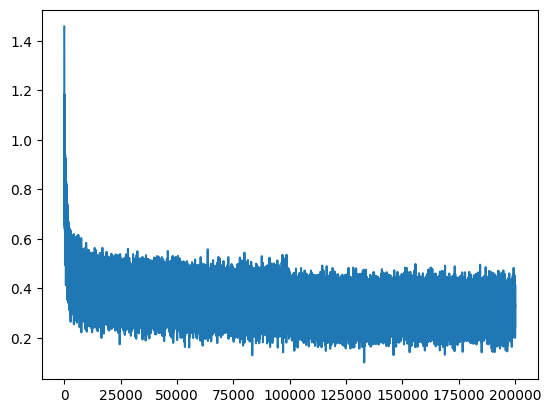

In [52]:
"""
Now look at the results for the training loss and dev loss to see how the model is doing, and evaluate 
any changes need to be made!
"""
plt.plot(stepi, lossi)

In [53]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1148, grad_fn=<NllLossBackward0>)

In [54]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1628, grad_fn=<NllLossBackward0>)

In [56]:
"""
Finally take a look at the model at work for some new sample names!
"""
for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

caristin.
raidarie.
maigh.
sajanna.
kariel.
gian.
dajaylynnn.
aileah.
abdulynasier.
ruxten.
niko.
addie.
ammiana.
adallarior.
elle.
stondon.
rirsimyerinia.
hixchesmiyah.
shaun.
amyr.
